# Regularized Linear Regression Project


In [183]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## Step 1: Load data

In [185]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv"

df = pd.read_csv(url)

In [186]:
df.sample(10, random_state=1)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
3026,54073,7507,726,9.670974,829,11.043027,949,12.641535,924,12.308512,1011,13.467430,1137,15.145864,946,12.601572,674,8.978287,311,4.142800,7252,96.603170,127,1.691754,17,0.226455,16,0.213134,0,0.000000,95,1.265486,7507,54,698,8.2,10.6,-2.4,-0.3,10.2,9.9,584,2747,1418,705,10.7,50.4,26.0,12.9,919,13.6,16.9,15.4,50768,45385,56151,2750,2574,176,6.4,50768,115.3,263.4,231.6,100.1,89.4,10.5,9.2,3.915976,2.776934,0.232797,4.057317,5.158944,11.652314,0,7527,1842,24.5,Pleasants,West Virginia,54,73,6110,53.4,51.0,56.0,3265,36.5,34.6,38.4,2230,10.2,9.3,11.2,622,12.6,11.0,14.3,768,14.7,13.6,15.8,896,3.4,3.1,3.6,205,6
2256,42029,522046,60996,11.684028,72065,13.804339,62094,11.894354,63244,12.114641,67282,12.888136,76341,14.623424,62609,11.993004,36494,6.990572,20921,4.007501,446751,85.576942,32709,6.265540,1457,0.279094,30539,5.849868,327,0.062638,10263,1.965919,522046,3112,13495,10.1,8.0,2.2,2.0,1.9,3.9,23654,75080,70157,181587,6.7,21.4,20.0,51.8,34311,6.7,7.8,7.1,99224,95985,102463,281572,272641,8931,3.2,99224,163.0,320.5,273.3,100.8,88.2,8.7,7.2,285.458812,231.081823,8.111710,422.950255,293.652047,1091.086110,93,514652,109411,21.3,Chester,Pennsylvania,42,29,403907,33.0,30.7,35.0,133178,25.1,23.7,26.5,101381,5.8,5.1,6.4,23274,5.6,4.5,6.8,22674,9.2,8.2,10.0,36979,2.6,2.4,2.8,10383,2
2563,48085,1005146,133960,13.327417,151546,15.077014,117972,11.736802,147122,14.636879,162184,16.135367,13275

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


## Step 2: EDA

### Choose three features related to health resources, to later select the target variable

- Total Hospitals (2019): 	Total Hospitals (2019) (Assumed proportion to fraction of state population living in county)
- Total Specialist Physicians (2019): Sum of Psychiatry, Surgery, Anesthesiology, Emergency Med, Radiology, Cardiology, Oncology, Endocrinology, and Other specialists (2019) (Assumed proportion to fraction of state population living in county	
- ICU Beds_x: Number of ICU beds per county

In [188]:
#Look for duplicated data

df.duplicated().any()

False

In [189]:
#Describe numerical features

df.describe()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,30401.640764,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1

In [190]:
#Describe categorical data

df.describe(include="O")

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [191]:
df.dtypes

fips                                                                               int64
TOT_POP                                                                            int64
0-9                                                                                int64
0-9 y/o % of total pop                                                           float64
19-Oct                                                                             int64
10-19 y/o % of total pop                                                         float64
20-29                                                                              int64
20-29 y/o % of total pop                                                         float64
30-39                                                                              int64
30-39 y/o % of total pop                                                         float64
40-49                                                                              int64
40-49 y/o % of total 

### Visualize distribution of features

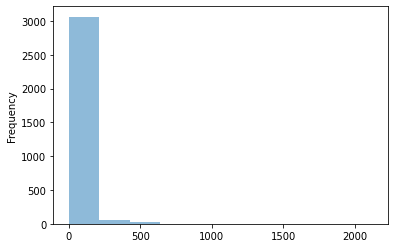

In [192]:
df['ICU Beds_x'].plot.hist(alpha=0.5)
plt.show()

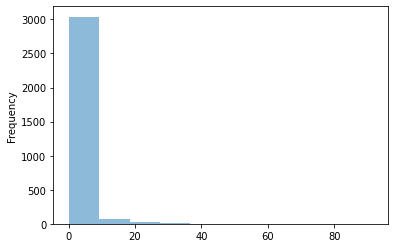

In [193]:
df['Total Hospitals (2019)'].plot.hist(alpha=0.5)
plt.show()


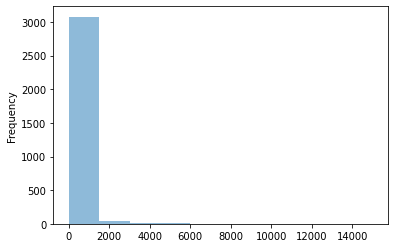

In [194]:
df['Total Specialist Physicians (2019)'].plot.hist(alpha=0.5)
plt.show()

The distribution is skewed in all three cases. This could be explained due to the number of population of a place.

### Check for outliers

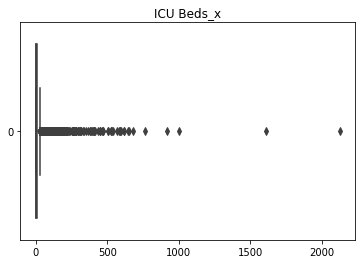

In [195]:
sns.boxplot(data = df['ICU Beds_x'], orient="h").set_title("ICU Beds_x")

plt.show()

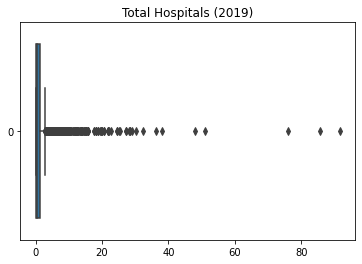

In [196]:
sns.boxplot(data = df['Total Hospitals (2019)'], orient="h").set_title("Total Hospitals (2019)")


plt.show()

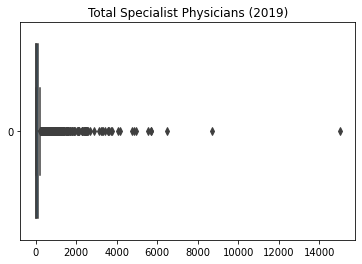

In [197]:
sns.boxplot(data = df['Total Specialist Physicians (2019)'], orient="h").set_title("Total Specialist Physicians (2019)")

plt.show()

### Correlation between features and population

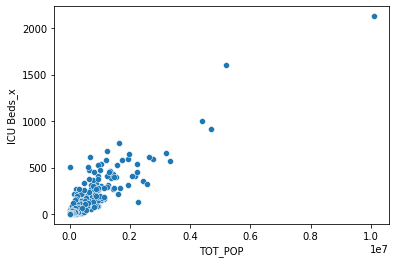

In [198]:
sns.scatterplot(data=df, x='TOT_POP', y='ICU Beds_x')
plt.show()

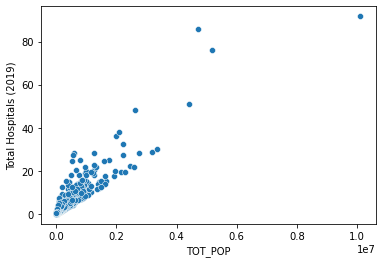

In [199]:
sns.scatterplot(data=df, x='TOT_POP', y='Total Hospitals (2019)')
plt.show()

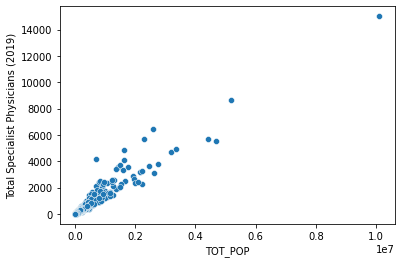

In [200]:
sns.scatterplot(data=df, x='TOT_POP', y='Total Specialist Physicians (2019)')
plt.show()

The plot suggests that there is a positive correlation in all three cases.

### The chosen target variable is "ICU Beds_x"

In [201]:
df.corrwith(df['ICU Beds_x'])

fips                                                                            -0.052409
TOT_POP                                                                          0.910824
0-9                                                                              0.899842
0-9 y/o % of total pop                                                           0.045824
19-Oct                                                                           0.899026
10-19 y/o % of total pop                                                        -0.000163
20-29                                                                            0.913979
20-29 y/o % of total pop                                                         0.192402
30-39                                                                            0.908021
30-39 y/o % of total pop                                                         0.302238
40-49                                                                            0.899891
40-49 y/o 

## Step 3

### Drop all the features related to health resources from X 

In [202]:

X = df.drop(['CNTY_FIPS','fips','Active Physicians per 100000 Population 2018 (AAMC)','Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)', 'Active Primary Care Physicians per 100000 Population 2018 (AAMC)', 'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)','Active General Surgeons per 100000 Population 2018 (AAMC)','Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)','Total nurse practitioners (2019)','Total physician assistants (2019)','Total physician assistants (2019)','Total Hospitals (2019)','Internal Medicine Primary Care (2019)','Family Medicine/General Practice Primary Care (2019)','STATE_NAME','COUNTY_NAME','ICU Beds_x','Total Specialist Physicians (2019)'], axis=1)
y = df['ICU Beds_x']

### Feature scaling

In [203]:
from sklearn.preprocessing import StandardScaler

columns = X.columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns = columns)
X_std.head()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,-0.122010,1.515069,-0.138129,0.263445,-0.176461,-1.067889,-0.156294,-0.503639,-0.167598,-0.724248,-0.155953,-0.475265,-0.051455,0.710731,-0.196442,-0.241496,-0.124761,-0.115433,-0.087858,-0.030480,-0.165397,-0.191608,-0.145679,-0.154872,-0.316235,0.250655,-0.284799,0.344613,-0.513170,0.060785,-0.045366,-0.117586,-0.132905,-0.158201,-0.145939,-0.333019,-0.234382,-0.447577,0.649528,-0.125899,-0.221739,-0.202843,-0.043632,0.472531,0.370220,0.566185,-0.151210,-0.151024,-0.152525,-0.353571,0.472531,1.468943,-0.143727,-0.175907,-1.013112,-1.936434,-0.148472,0.126376,0.116487,0.087963,-0.133552,0.172860,0.177849,0.154082,-0.135426,-0.402548,-0.380391,-0.392897,-0.144279,-0.211219,-0.256304,-0.206071,-0.138900,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865
1,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,0.332513,0.715673,0.382732,0.153177,0.521999,0.215895,0.676174,0.543366,0.442092,-0.284722,0.466348,0.170748,0.093946,-0.027772,0.067848,-0.203651,-0.083125,-0.141497,-0.049532,-0.076506,0.094029,-0.219210,0.341296,1.518514,-0.057592,-0.264720,-0.024296,-0.173131,-0.282330,2.122197,2.080476,0.153846,0.427106,0.424717,0.302694,-0.585511,-0.929601,0.109546,1.031174,0.169743,-0.874172,-0.809046,-0.772798,0.346684,0.429724,0.265300,0.251083,0.253105,0.199125,-0.353571,0.346684,1.295171,0.308018,0.524398,0.280924,-1.936434,0.348569,-1.033783,-1.014030,-1.024682,0.358089,-1.177782,-1.121488,-1.222259,0.342286,-0.459421,-0.504688,-0.392897,0.500641,-0.211219,-0.304203,-0.129545,0.563986,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704
2,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,-0.225725,0.581419,-0.242545,-0.237619,-0.256141,-0.323597,-0.245329,0.279761,-0.247685,-0.339951,-0.284302,-2.167118,-0.032350,2.697983,-0.215653,-0.218321,-0.137705,-0.385204,-0.095158,0.045333,-0.229374,-0.575901,-0

#### Now that you have a better knowledge of the data, apply the LASSO model which already includes feature selection to obtain the most important features that influence in your target variable.

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

**Apply lasso regression on the training set with an arbitrarily regularization parameter α of 1.**

In [217]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

print(lasso.coef_ , lasso.intercept_)

[ 0.          0.          0.          0.         -0.          0.
 -0.          0.          1.93877257  0.         -1.05335594  0.
 -0.          0.          0.          0.         -0.          0.
  0.          0.          0.         12.81377768  0.         -0.
 -0.         -0.         -1.48666924 -0.         -0.          0.
  0.          0.         -0.0675454  14.94420121  0.75489848  0.
  0.         -0.         -0.         -0.         -0.          0.
  0.         15.87770788 -0.62105382 -1.29869476  0.          0.07737901
  0.         -0.          0.          0.         -0.         -3.20742056
 -0.          0.          0.          0.         -0.22374576 -0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         40.58440099 -0.         -0.
 -0.          0.          0.          0.         -0.          0.
 -0.     

In [218]:
#Model evaluation

print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

R squared training set 89.27
R squared test set 79.36


**Find the optimal value of alpha**

In [219]:
from sklearn.linear_model import LassoCV


model = LassoCV(cv=5, random_state=0, max_iter=10000)

model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [220]:
model.alpha_

0.7062950078246525

**Use best value of alpha**

In [221]:
lasso = Lasso(alpha=model.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.7062950078246525)

In [222]:
print(lasso.coef_ , lasso.intercept_)

[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.57943316e+00 -0.00000000e+00 -1.04115376e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.15113275e+01  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.00781011e+00 -1.77874488e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.10275543e+00  1.43745291e+01  1.12941625e+00  1.69338544e-01
 -0.00000000e+00 -2.61519625e-02 -0.00000000e+00 -0.00000000e+00
 -7.84098429e-01 -0.00000000e+00  0.00000000e+00  1.87692294e+01
 -1.31495565e+00 -1.69017428e+00  0.00000000e+00  4.36464637e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -4.84948868e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -6.63958694e-01 -0.00000000e+00
  0.00000000e+00  0.00000

In [223]:
print('R squared training set', round(lasso.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso.score(X_test, y_test)*100, 2))

R squared training set 89.5
R squared test set 80.08


 #### Most important features that influence the target variable

In [224]:
coef_list=lasso.coef_
loc=[i for i, e in enumerate(coef_list) if e != 0]
col_name=X.columns
col_name[loc]

Index(['30-39 y/o % of total pop', '40-49 y/o % of total pop',
       'Black-alone pop', 'Asian-alone pop', '% Asian-alone', 'N_POP_CHG_2018',
       'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_INTERNATIONAL_MIG_2018', 'Less than a high school diploma 2014-18',
       'Bachelor's degree or higher 2014-18',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'CI90LBINC_2018', 'Unemployment_rate_2018', 'COPD_number'],
      dtype='object')

### Find the parameters for your linear regression between your selected features and your chosen target. Use ordinary least squares regression to choose the parameters that minimize the error of a linear function.

In [226]:
import statsmodels.api as sm
from statsmodels.api import OLS

selected_features_train = X_train[["30-39 y/o % of total pop", "40-49 y/o % of total pop",
       "Black-alone pop", "Asian-alone pop", "% Asian-alone", "N_POP_CHG_2018",
       "GQ_ESTIMATES_2018", "R_birth_2018", "R_death_2018",
       "R_INTERNATIONAL_MIG_2018", "Less than a high school diploma 2014-18",
       "Bachelor's degree or higher 2014-18",
       "Percent of adults with less than a high school diploma 2014-18",
       "Percent of adults with a high school diploma only 2014-18",
       "Percent of adults with a bachelor's degree or higher 2014-18",
       "CI90LBINC_2018", "Unemployment_rate_2018", "COPD_number"]]

x_interceptor = sm.add_constant(selected_features_train)
model = sm.OLS(y_train, x_interceptor)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ICU Beds_x   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     1074.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):               0.00
Time:                        04:43:18   Log-Likelihood:                -10545.
No. Observations:                2198   AIC:                         2.113e+04
Df Residuals:                    2179   BIC:                         2.124e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
const                                                             24.0404      0.629     38.212      0.000      22.807      25.274
30-39 y/o % of total pop                                           4.3732      0.950      4.601      0.000       2.509       6.237
40-49 y/o % of total pop                                          -1.3082      0.934     -1.400      0.162      -3.140       0.524
Black-alone pop                                                    8.0007      1.312      6.099      0.000       5.428      10.573
Asian-alone pop                                                   -4.2345      2.378     -1.781      0.075      -8.898       0.429
% Asian-alone                                                     -3.0985      1.162     -2.667      0.008      -5.377      -0.820
N_POP_CHG_2018                                                    -4.3238      0.795     -5.438      0.000      -5.883      -2.764
GQ_ESTIMATES_2018                                                 13.7271      1.568      8.755      0.000      10.652      16.802
R_birth_2018                                                       2.1723      0.755      2.879      0.004       0.693       3.652
R_death_2018                                                       0.9168      0.866      1.058      0.290      -0.782       2.616
R_INTERNATIONAL_MIG_2018                                          -1.0875      0.778     -1.397      0.162      -2.614       0.439
Less than a high school diploma 2014-18                          -11.3796      2.467     -4.612      0.000     -16.218      -6.541
Bachelor's degree or higher 2014-18                               24.8437      2.837      8.756      0.000      19.279      30.408
Percent of adults with less than a high school diploma 2014-18    -2.3163      1.069     -2.166      0.030      -4.413      -0.219
Percent of adults with a high school diploma only 2014-18         -2.9481      1.193     -2.471      0.014      -5.288      -0.608
Percent of adults with a bachelor's degree or higher 2014-18       1.0746      1.651      0.651      0.515      -2.163       4.312
CI90LBINC_2018                                                    -8.6617      1.226     -7.065      0.000     -11.066      -6.257
Unemployment_rate_2018                                            -1.9575      0.737     -2.657      0.008      -3.402      -0.513
COPD_number                                                       54.8517      3.053     17.965      0.000      48.864      60.839
==============================================================================
Omnibus:                     1877.278   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jar